In [140]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [142]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [143]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [144]:
df[pd.isnull(df).any(axis = 1)] #no missing variables to fix

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [145]:
df_train = df.copy()

In [146]:
attrition = df.pop('Attrition')

In [147]:
df_train = df.copy()

In [148]:
travel = df.pop('BusinessTravel')

In [149]:
over18 = df.pop('Over18')

In [150]:
overtime = df.pop('OverTime')

In [151]:
df['MaritalStatus'].replace('Single', 0, inplace= True)
df['MaritalStatus'].replace('Married', 1, inplace= True)
df['MaritalStatus'].replace('Divorced', 2, inplace= True)

/var/folders/gm/kf61wf7d0rngwszt66rdf98r0000gn/T/ipykernel_28763/3715392032.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MaritalStatus'].replace('Single', 0, inplace= True)
/var/folders/gm/kf61wf7d0rngwszt66rdf98r0000gn/T/ipykernel_28763/3715392032.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [152]:
unique_job_roles = df['JobRole'].unique()

role_mapping = {role: i for i, role in enumerate(unique_job_roles)}

df['JobRole'] = df['JobRole'].map(role_mapping)

In [153]:
df['Gender'].replace('Female', 0, inplace = True)
df['Gender'].replace('Male', 1, inplace = True)


/var/folders/gm/kf61wf7d0rngwszt66rdf98r0000gn/T/ipykernel_28763/2652702883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace('Female', 0, inplace = True)
/var/folders/gm/kf61wf7d0rngwszt66rdf98r0000gn/T/ipykernel_28763/2652702883.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [154]:
unique_departments = df['Department'].unique()

dept_mapping = {role: i for i, role in enumerate(unique_departments)}

df['Department'] = df['Department'].map(dept_mapping)

In [155]:
unique_education_fields = df['EducationField'].unique()

edu_mapping = {role: i for i, role in enumerate(unique_education_fields)}

df['EducationField'] = df['EducationField'].map(edu_mapping)

In [156]:
varcov_matrix = df.cov()

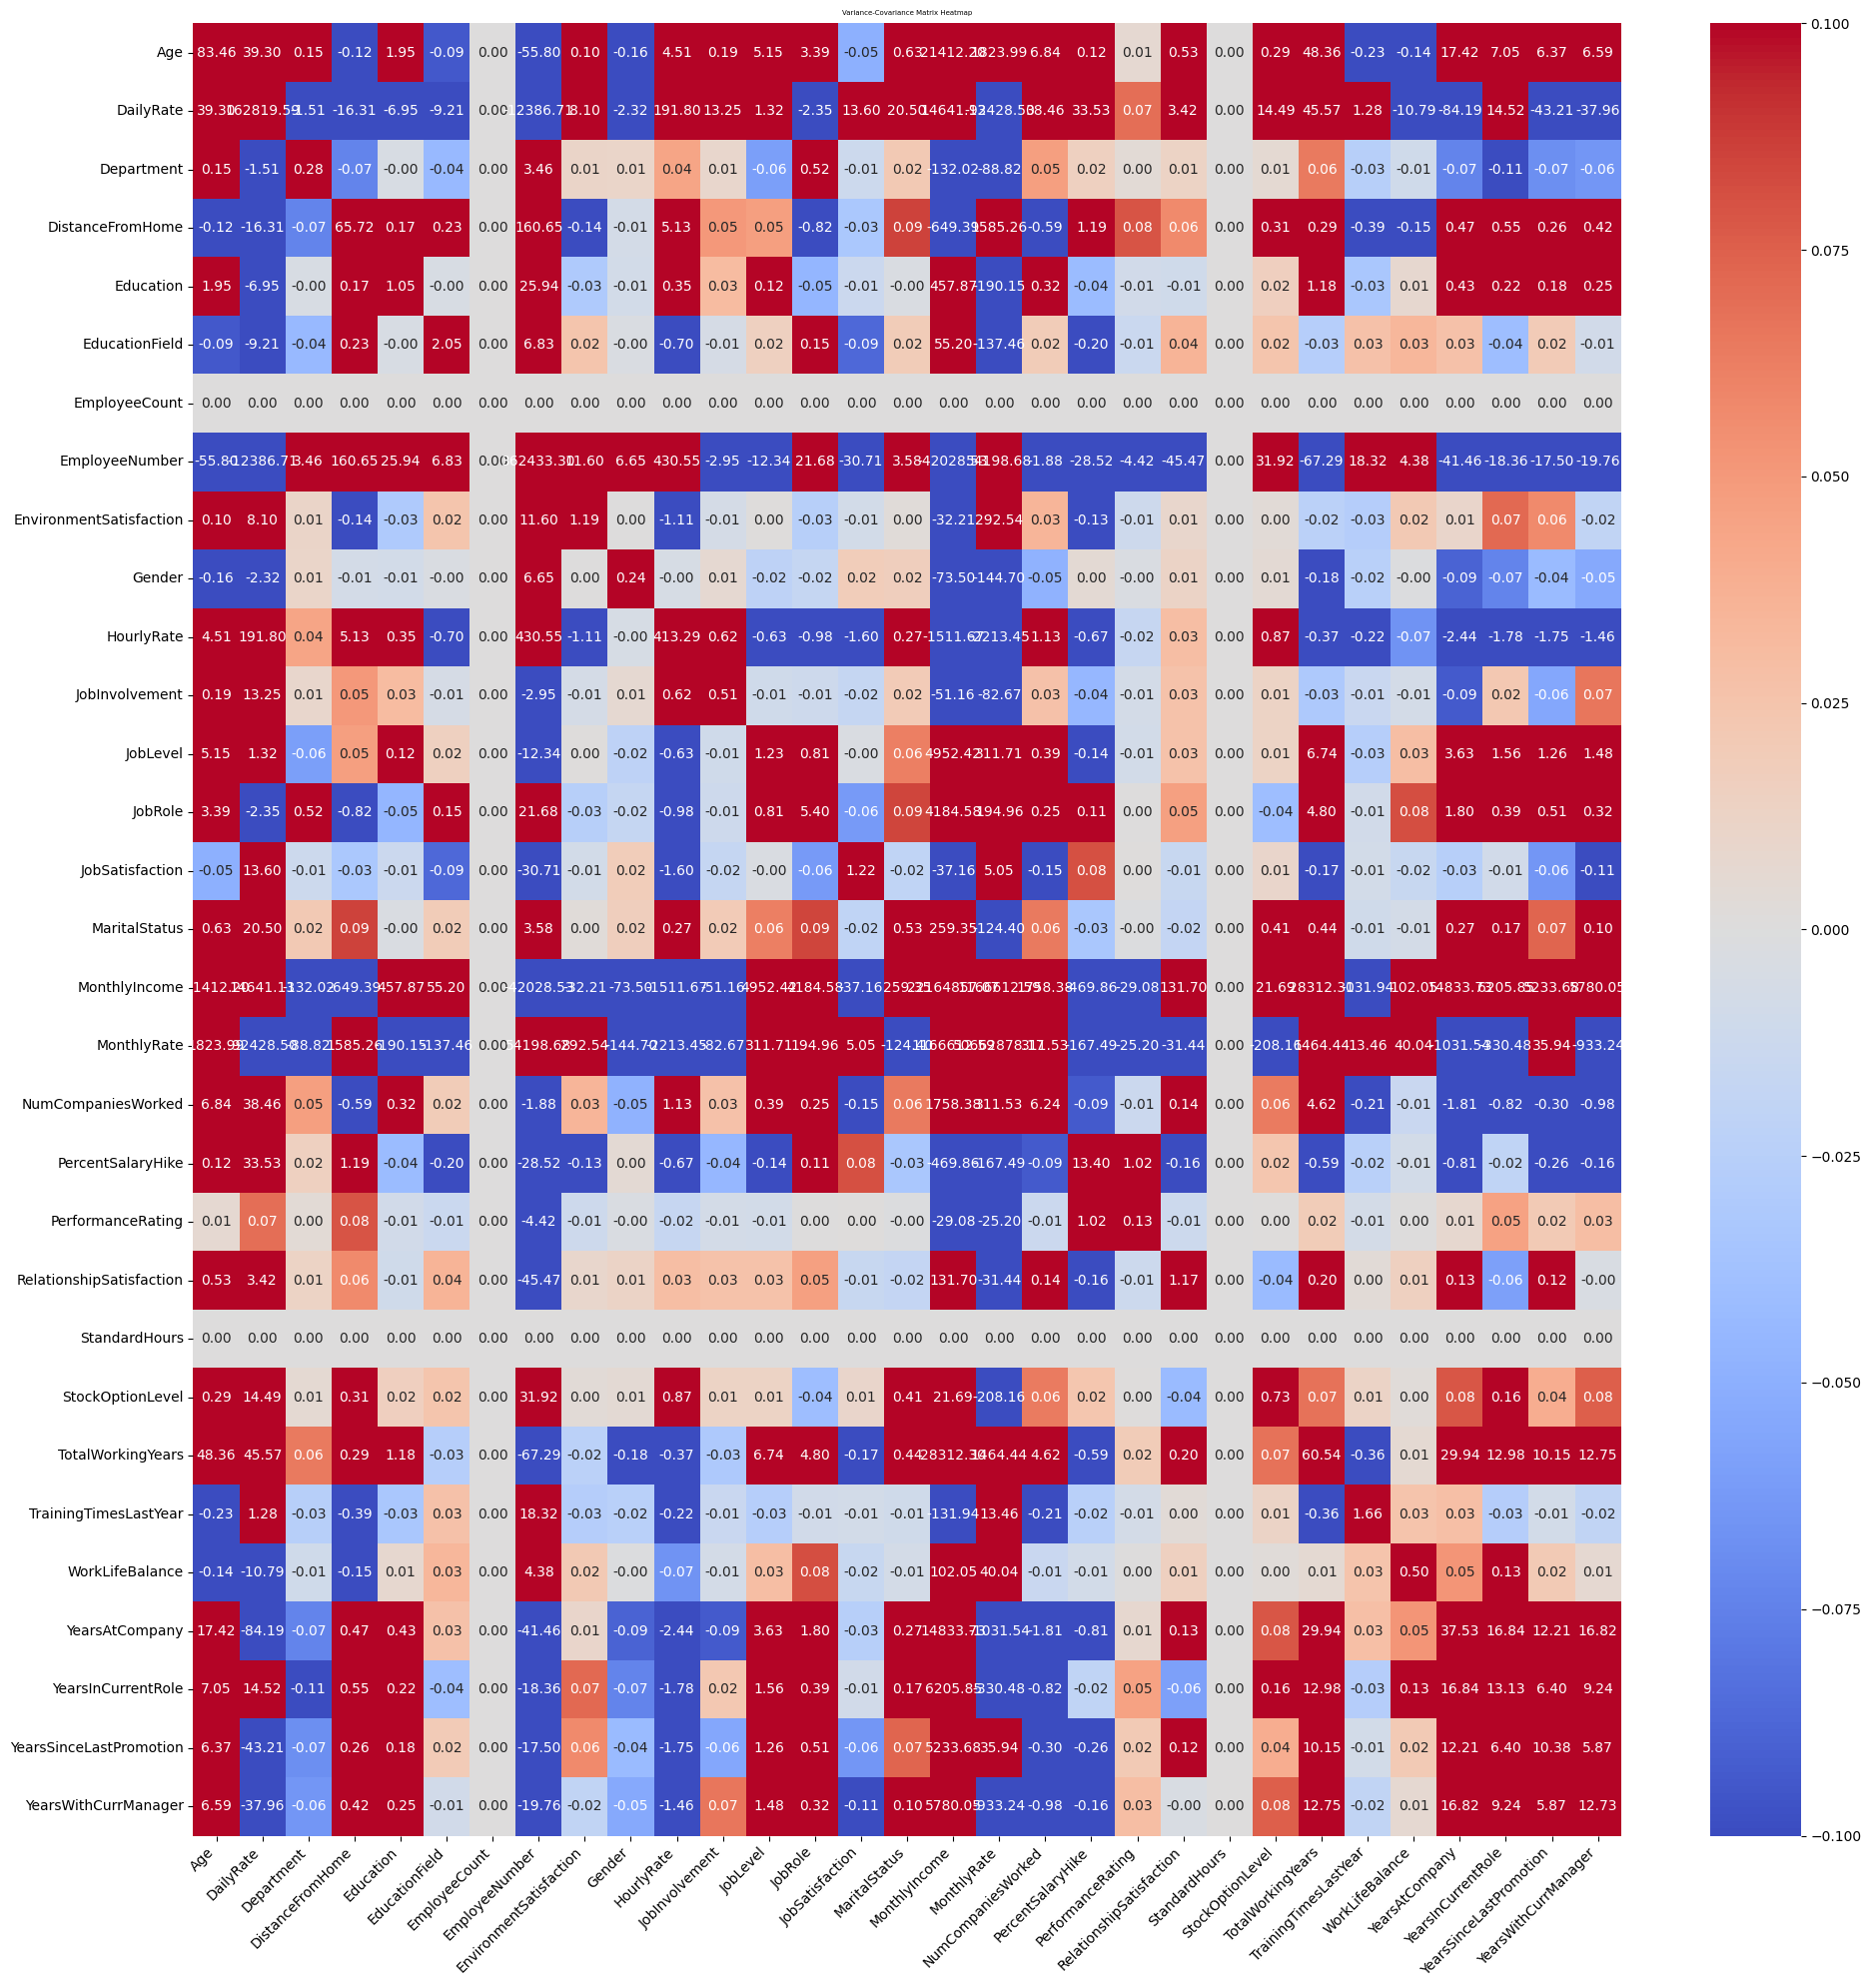

In [157]:
vmin = -0.1
vmax = 0.1

# Plot the covariance matrix using a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(varcov_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            xticklabels=varcov_matrix.columns, yticklabels=varcov_matrix.columns,
            center=0, vmin=vmin, vmax=vmax)  # Ensure the color scale is centered around 0
plt.title('Variance-Covariance Matrix Heatmap', fontsize=5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [158]:
print(varcov_matrix)

                                   Age      DailyRate  Department  \
Age                          83.455049      39.298434    0.153723   
DailyRate                    39.298434  162819.593737   -1.513936   
Department                    0.153723      -1.513936    0.278565   
DistanceFromHome             -0.124873     -16.308004   -0.073700   
Education                     1.946390      -6.945424   -0.004322   
EducationField               -0.094071      -9.210542   -0.043451   
EmployeeCount                 0.000000       0.000000    0.000000   
EmployeeNumber              -55.797199  -12386.713294    3.461819   
EnvironmentSatisfaction       0.101319       8.095750    0.011190   
Gender                       -0.162560      -2.316814    0.010756   
HourlyRate                    4.510422     191.800350    0.044461   
JobInvolvement                0.193841      13.246309    0.009233   
JobLevel                      5.153276       1.324944   -0.059570   
JobRole                       3.39

In [159]:
#remove monthly income and rate to make a better image
df_for_covar = df.copy()
df_for_covar.pop('MonthlyRate')
df_for_covar.pop('MonthlyIncome')

varcov_matrix = df_for_covar.cov()


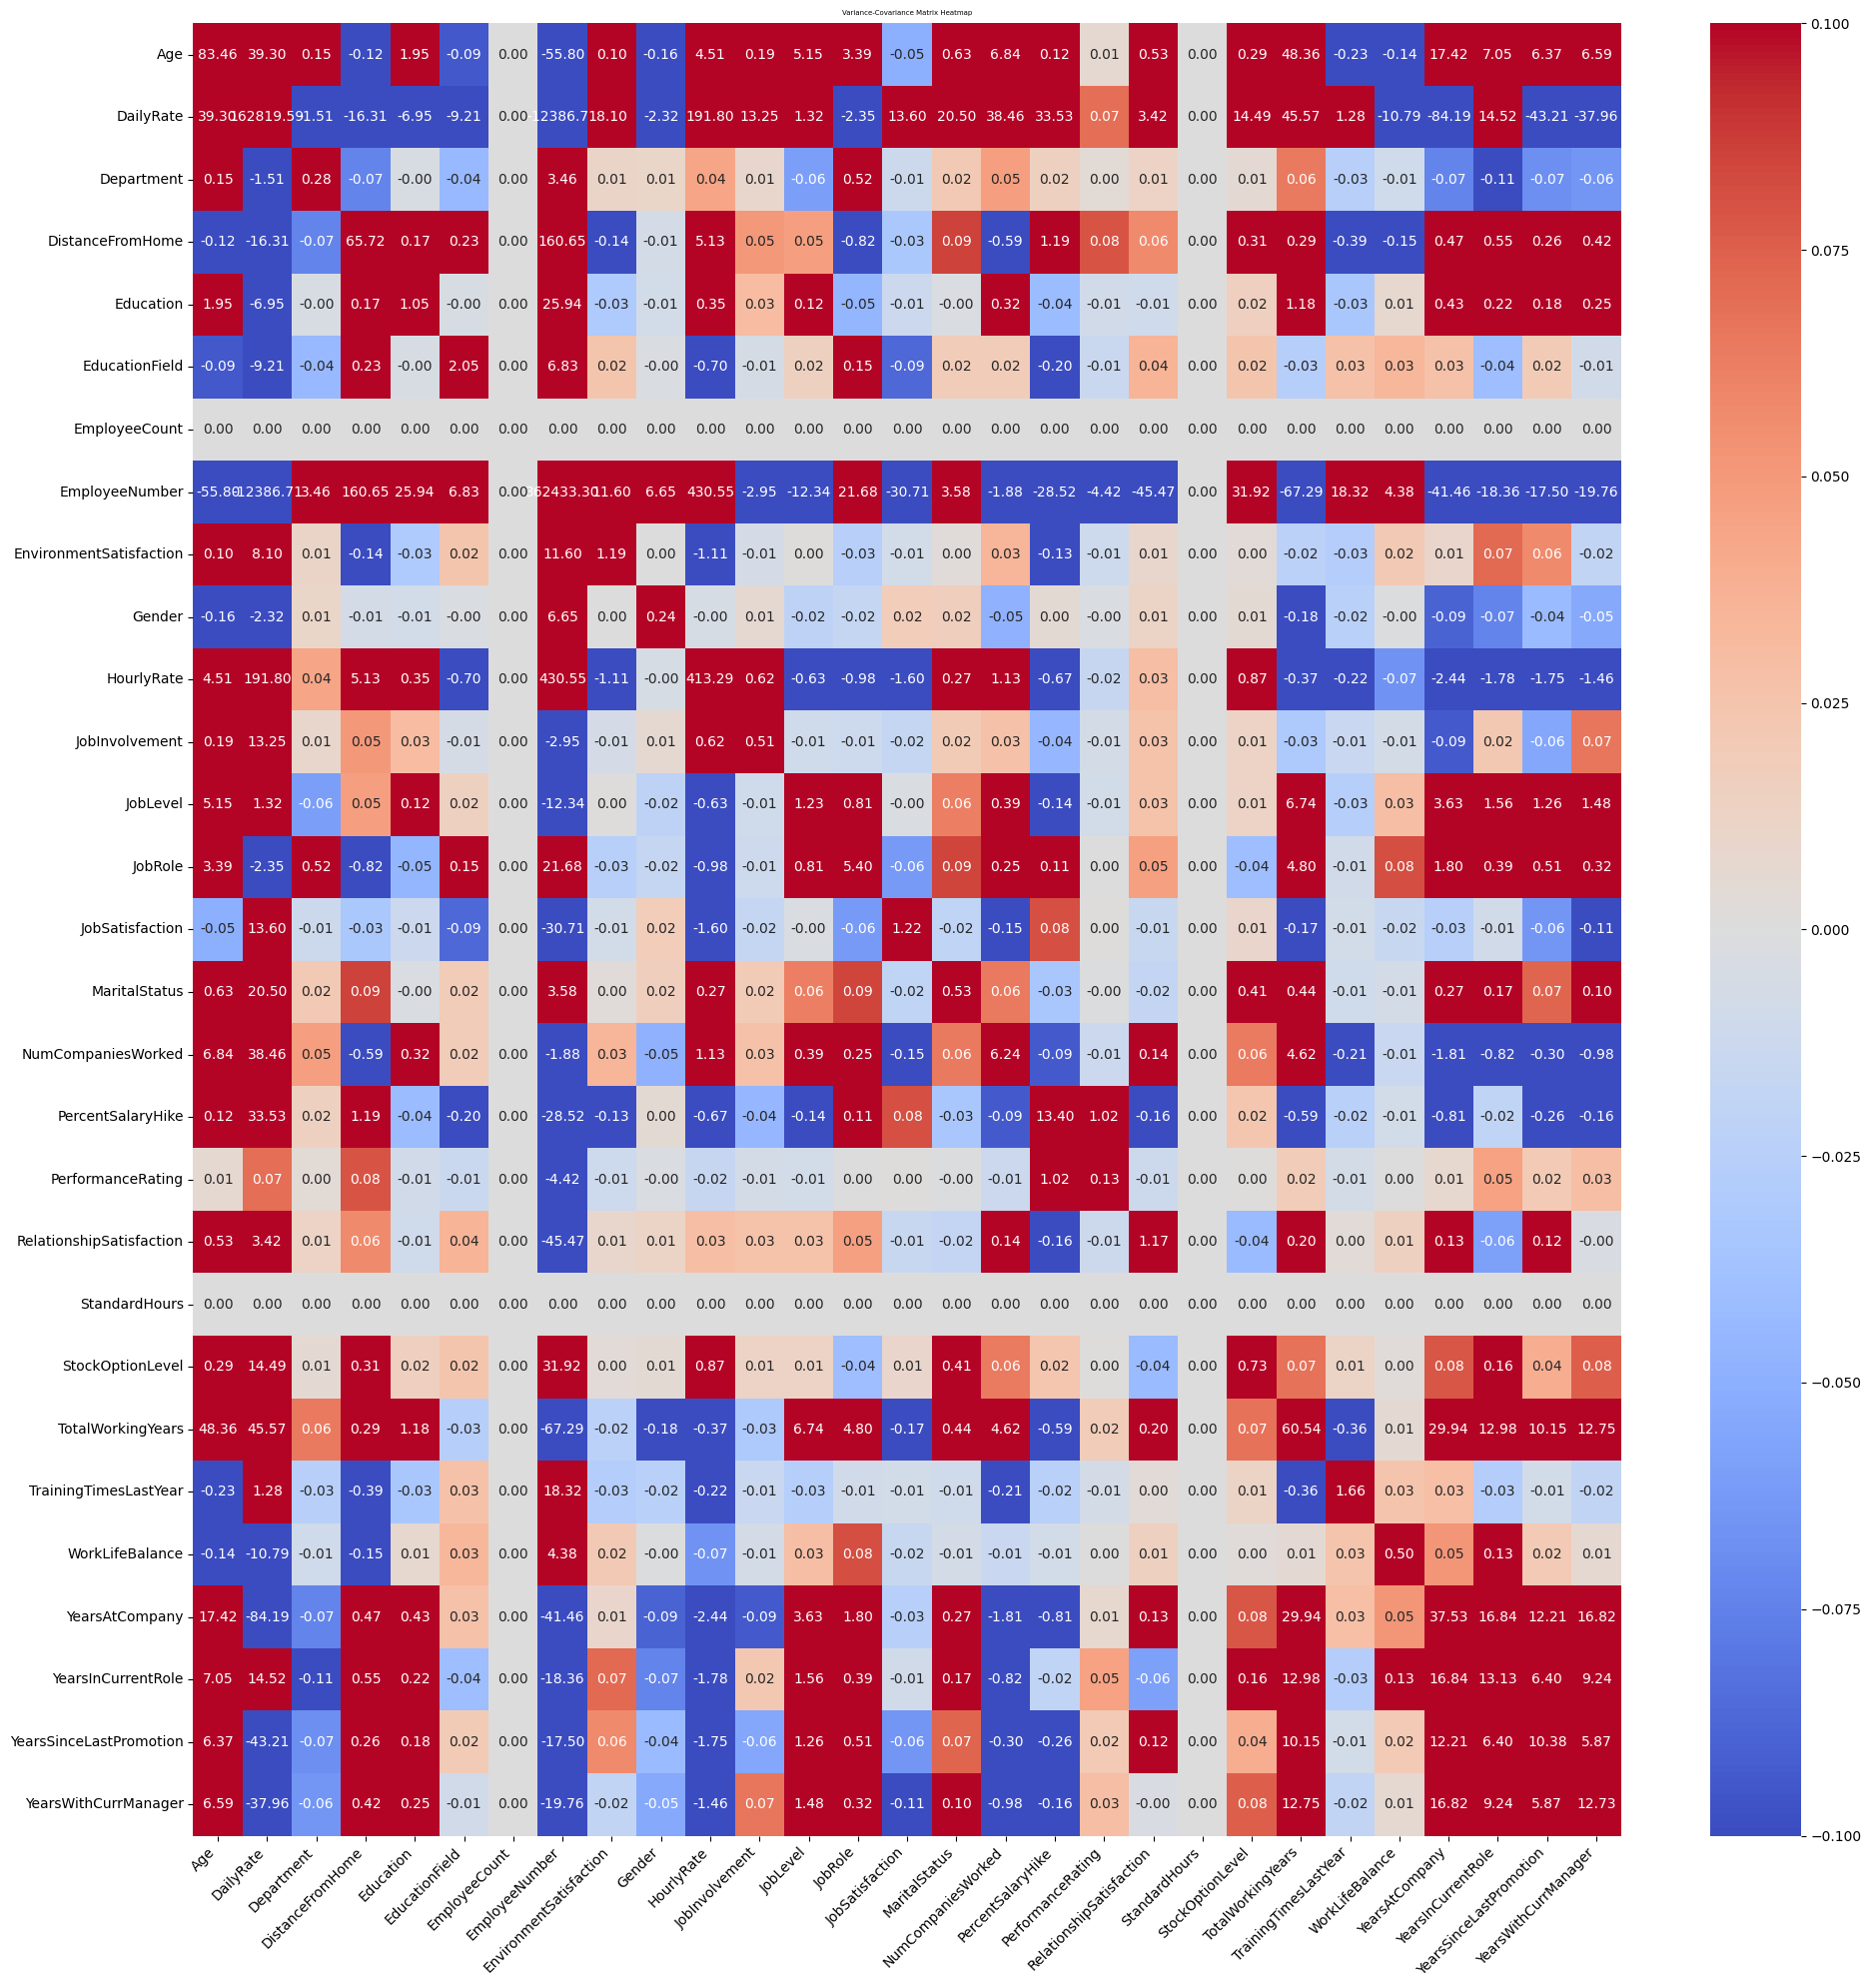

In [160]:

vmin = -0.1
vmax = 0.1

# Plot the covariance matrix using a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(varcov_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            xticklabels=varcov_matrix.columns, yticklabels=varcov_matrix.columns,
            center=0, vmin=vmin, vmax=vmax)  # Ensure the color scale is centered around 0
plt.title('Variance-Covariance Matrix Heatmap', fontsize=5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/var/folders/gm/kf61wf7d0rngwszt66rdf98r0000gn/T/ipykernel_28763/2853781684.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['MaritalStatus'].replace({'Single': 0, 'Married': 1, 'Divorced': 2}, inplace=True)
/var/folders/gm/kf61wf7d0rngwszt66rdf98r0000gn/T/ipykernel_28763/2853781684.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.se

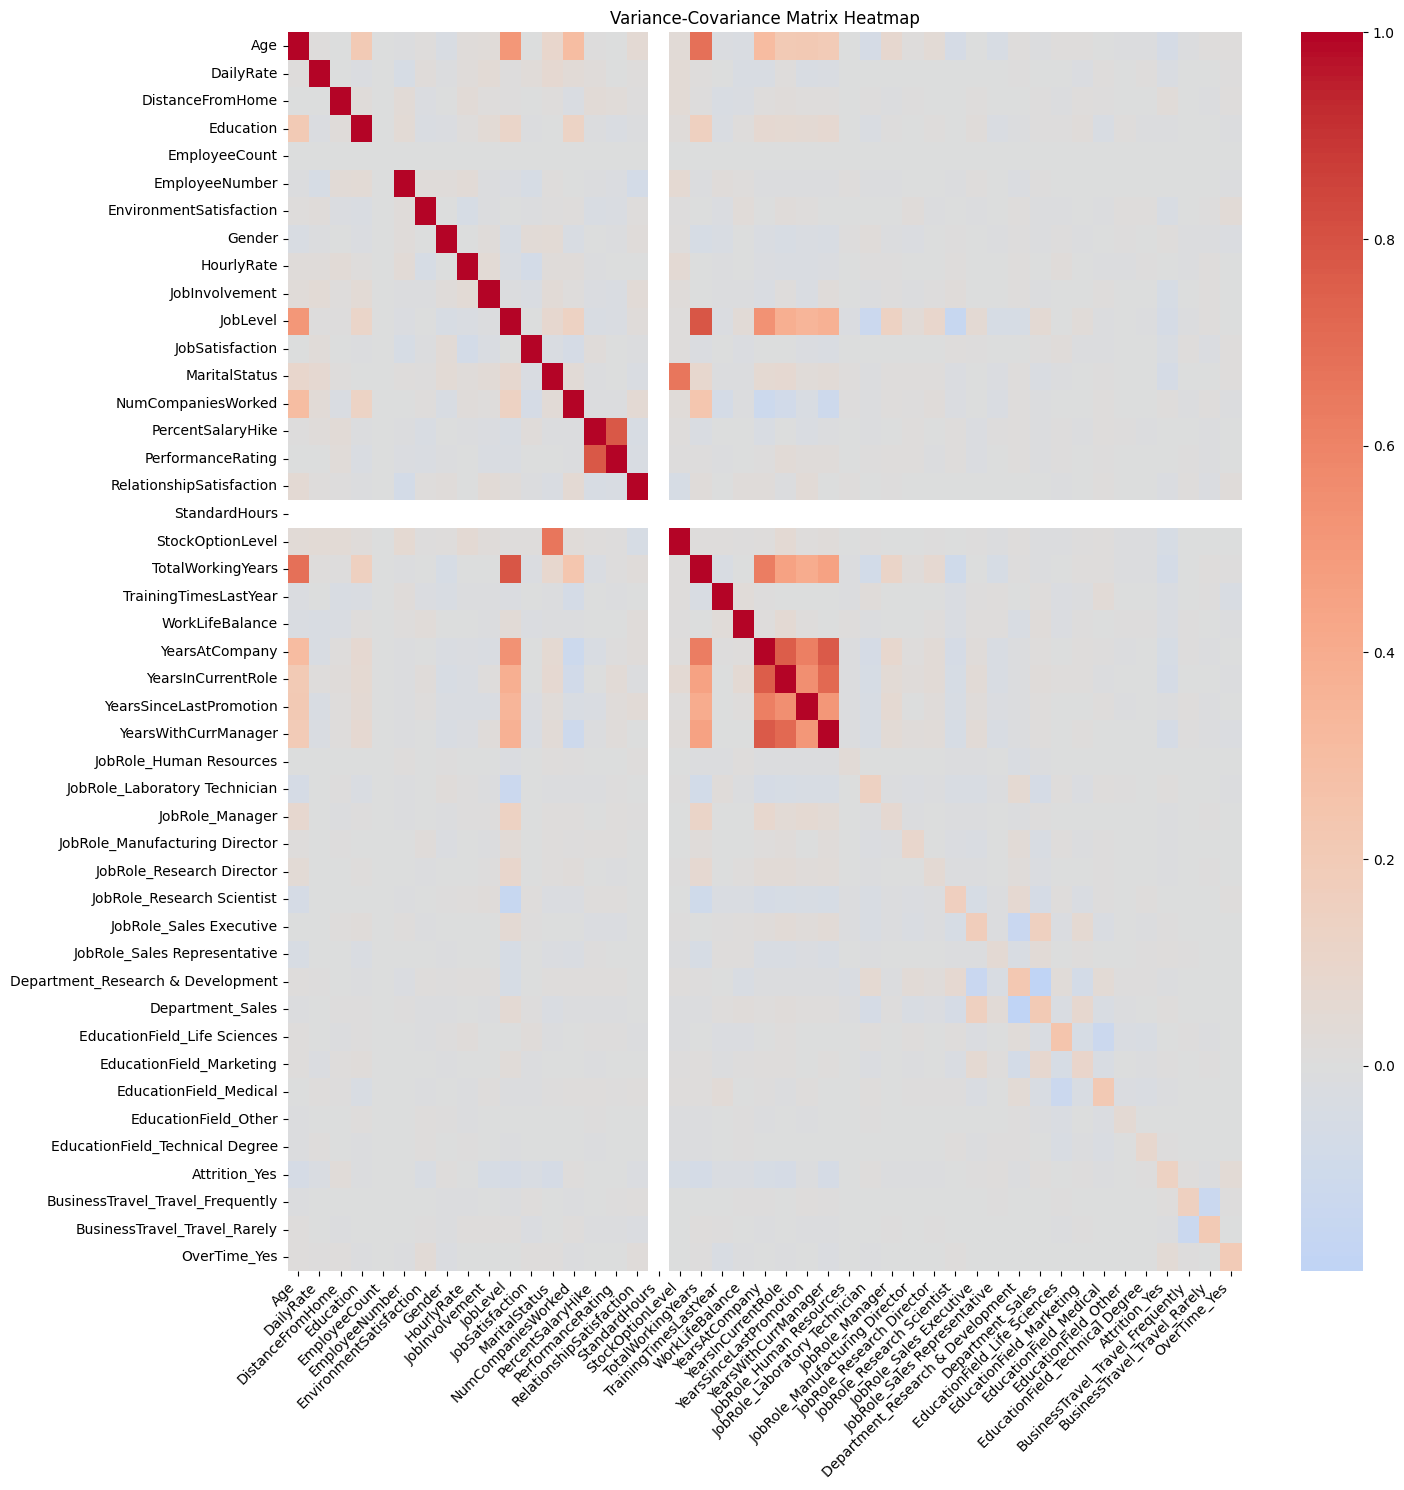

In [ ]:

#chatgpt varcov matrix
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

df_cleaned = df.copy()

df_cleaned['MaritalStatus'].replace({'Single': 0, 'Married': 1, 'Divorced': 2}, inplace=True)
df_cleaned['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

df_cleaned = pd.get_dummies(df_cleaned, columns=['JobRole', 'Department', 'EducationField', 'Attrition', 'BusinessTravel', 'Over18', 'OverTime'], drop_first=True)

# Normalize numerical variables
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numerical_columns] = (df_cleaned[numerical_columns] - df_cleaned[numerical_columns].mean()) / df_cleaned[numerical_columns].std()

# Drop high-variance columns early
df_cleaned.drop(columns=['MonthlyRate', 'MonthlyIncome'], inplace=True)

# Compute covariance matrix
varcov_matrix = df_cleaned.cov()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(varcov_matrix, annot=False, cmap="coolwarm",
            xticklabels=varcov_matrix.columns, yticklabels=varcov_matrix.columns,
            center=0)
plt.title('Variance-Covariance Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()